# Guided Project - Predicting House Sale Prices
## Project Description
We are using the famous Ames, Iowa dataset to experiment on predictions with ML models by trying to predict House Sale Prices.
We are going to apply Linear Regression for our models.
The project is going to divide in the following steps:
1. Import Data and Initial EDA
2. Data Cleaning
3. Feature Engineering
4. Feature Selection
5. Model Training & Testing
6. Create functions to summarize all the above steps
## 1. Import Data and Initial EDA

In [329]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn import linear_model
pd.options.display.max_columns = 999
import matplotlib.pyplot as plt
%matplotlib inline

In [330]:
# data import
data = pd.read_csv('AmesHousing.tsv', delimiter='\t')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112,TA,TA,CBlock,TA,Gd,Gd,BLQ,639,Unf,0,441,1080,GasA,Fa,Y,SBrkr,1656,0,0,1656,1,0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960,Fin,2,528,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0,Gd,TA,CBlock,TA,TA,No,ALQ,1065,Unf,0,1045,2110,GasA,Ex,Y,SBrkr,2110,0,0,2110,1,0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968,Fin,2,522,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [332]:
data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930,2930,2930,2440,2930,2930,2930,2930,2930,2907,2929,2929,2929,2929,2930,2930,2930,2930,2928,2928,2930,2930,2930,2930,2930,2930,2771,2929,2929,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930
mean,1466,714464497,57,69,10148,6,6,1971,1984,102,443,50,559,1052,1160,335,5,1500,0,0,2,0,3,1,6,1,1978,2,473,94,48,23,3,16,2,51,6,2008,180796
std,846,188730845,43,23,7880,1,1,30,21,179,456,169,439,441,392,428,46,506,1,0,1,1,1,0,2,1,26,1,215,126,67,64,25,56,36,566,3,1,79887
min,1,526301100,20,21,1300,1,1,1872,1950,0,0,0,0,0,334,0,0,334,0,0,0,0,0,0,2,0,1895,0,0,0,0,0,0,0,0,0,1,2006,12789
25%,733,528477022,20,58,7440,5,5,1954,1965,0,0,0,219,793,876,0,0,1126,0,0,1,0,2,1,5,0,1960,1,320,0,0,0,0,0,0,0,4,2007,129500
50%,1466,535453620,50,68,9436,6,5,1973,1993,0,370,0,466,990,1084,0,0,1442,0,0,2,0,3,1,6,1,1979,2,480,0,27,0,0,0,0,0,6,2008,160000
75%,2198,907181098,70,80,11555,7,6,2001,2004,164,734,0,802,1302,1384,704,0,1743,1,0,2,1,3,1,7,1,2002,2,576,168,70,0,0,0,0,0,8,2009,213500
max,2930,1007100110,190,313,215245,10,9,2010,2010,1600,5644,1526,2336,6110,5095,2065,1064,5642,3,2,4,2,8,3,15,4,2207,5,1488,1424,742,1012,508,576,800,17000,12,2010,755000


In [333]:
data.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

## 2. Data Cleaning
After performing an initial check on the dataset we are going to clean it up.
We are going to check:
- 2.1 Drop numeric columns with over 5% of null values;
- 2.2 Drop text columns with more than one missing value;
- 2.3 Fill numeric columns left with median values;

In [334]:
data_df = data.copy()

In [335]:
# display columns
print(data_df.columns)
print(len(data_df.columns))

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

### 2.1 Clean Numeric Columns
Identify numeric columns first and null values in these columns.

In [336]:
# identify numeric columns
numeric_cols = data_df.select_dtypes(include=['int','float'])
# select cutoff for null value% in columns
cutoff = round(len(data_df)/20,2)

In [337]:
# display numeric columns
print(numeric_cols.columns)
print(len(numeric_cols.columns))

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')
39


In [338]:
# find null values
null_counts = numeric_cols.isnull().sum()
# filter columns
null_counts = null_counts[null_counts > cutoff]

In [339]:
# display columns we are going to drop
null_counts.index

Index(['Lot Frontage', 'Garage Yr Blt'], dtype='object')

In [340]:
# drop columns we indentified earlier
data_df = data_df.drop(null_counts.index, axis=1)
print(data_df.columns)
print(len(data_df.columns))

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Finish', 'Garage Cars', 'Garage

### 2.2 Clean Text Columns

In [341]:
# identify text columns
text_cols = data_df.select_dtypes(include=['object'])
print(text_cols.columns)
print(len(text_cols.columns))

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')
43


We have 43 columns that are object and we need to check.

In [342]:
# check null values in text columns displayed above
# find null values
null_text_counts = text_cols.isnull().sum()
# filter columns
null_text_counts = null_text_counts[null_text_counts > 0]

In [ ]:
print(null_text_counts.index)
print(len(null_text_counts))

We are going to drop 16 columns from the dataset as they have one or more missing value.

In [343]:
# drop text columns  with more than one missing value
data_df = data_df.drop(null_text_counts.index, axis=1)
print(data_df.columns)
print(len(data_df.columns))

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Garage Cars', 'Garage Area', 'Paved Drive',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'Sale Ty

We are left with 64 columns. Now are are going to fill null numeric values based on the median.
### 2.3 Fill Numeric Null values

In [344]:
# confirm no text column is left with missing values
text_cols = data_df.select_dtypes(include=['object'])
null_text_counts = text_cols.isnull().sum()
print(null_text_counts)

MS Zoning         0
Street            0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Exter Qual        0
Exter Cond        0
Foundation        0
Heating           0
Heating QC        0
Central Air       0
Kitchen Qual      0
Functional        0
Paved Drive       0
Sale Type         0
Sale Condition    0
dtype: int64


In [345]:
# fill numeric columns with median values
# get numeric columns to fillna with mean
num_cols = data_df.select_dtypes(include=['int','float'])
num_cols_name = num_cols.columns
num_cols.mean()

Order                  1466
PID               714464497
MS SubClass              57
Lot Area              10148
Overall Qual              6
Overall Cond              6
Year Built             1971
Year Remod/Add         1984
Mas Vnr Area            102
BsmtFin SF 1            443
BsmtFin SF 2             50
Bsmt Unf SF             559
Total Bsmt SF          1052
1st Flr SF             1160
2nd Flr SF              335
Low Qual Fin SF           5
Gr Liv Area            1500
Bsmt Full Bath            0
Bsmt Half Bath            0
Full Bath                 2
Half Bath                 0
Bedroom AbvGr             3
Kitchen AbvGr             1
TotRms AbvGrd             6
Fireplaces                1
Garage Cars               2
Garage Area             473
Wood Deck SF             94
Open Porch SF            48
Enclosed Porch           23
3Ssn Porch                3
Screen Porch             16
Pool Area                 2
Misc Val                 51
Mo Sold                   6
Yr Sold             

In [346]:
# fill values
data_df[num_cols_name] = data_df[num_cols_name].fillna(num_cols.mean())

In [347]:
# check there is no column with null values left
data_df.isnull().sum()

Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Area          0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 64, dtype: int64

## 3. Feature Engineering
We are going to create a couple of columns:
- 3.1 Years Before Sale
- 3.2 Years Until Remod
- 3.3 Drop columns not useful for ML
### 3.1 Year Before Sale

In [348]:
# get year_before_sale as difference between Year Sold and Year Built
data_df[['Year Built','Year Remod/Add','Yr Sold']].head()

,Year Built,Year Remod/Add,Yr Sold
0,1960,1960,2010
1,1961,1961,2010
2,1958,1958,2010
3,1968,1968,2010
4,1997,1998,2010


In [349]:
data_df['years_before_sale'] = data_df['Yr Sold'] - data_df['Year Built']
data_df['years_before_sale'].value_counts(ascending=False, normalize=True)

 1     0 
 0     0 
 2     0 
 4     0 
 5     0 
       ..
 120   0 
 122   0 
-1     0 
 126   0 
 101   0 
Name: years_before_sale, Length: 128, dtype: float64

In [350]:
# there is a -1 we need to replace it with 0
data_df['years_before_sale'] = data_df['years_before_sale'].replace(-1,0)
data_df['years_before_sale'].value_counts(ascending=False, normalize=True)
# looks correct below

1     0 
0     0 
2     0 
4     0 
6     0 
      ..
120   0 
122   0 
111   0 
126   0 
101   0 
Name: years_before_sale, Length: 127, dtype: float64

### 3.2 Years Until Remod

In [351]:
# get year_until_remod as difference between Year Remod/Add and Year Built
data_df['years_until_remod'] = data_df['Year Remod/Add'] - data_df['Year Built']
data_df['years_until_remod'].value_counts(ascending=False, normalize=True)

0     1 
1     0 
30    0 
40    0 
25    0 
      ..
107   0 
115   0 
123   0 
122   0 
101   0 
Name: years_until_remod, Length: 117, dtype: float64

In [352]:
# there is a -1 we need to replace it with 0
data_df['years_until_remod'] = data_df['years_until_remod'].replace(-1,0)
data_df['years_until_remod'].value_counts(ascending=False, normalize=True)
# looks correct below

0     1 
1     0 
30    0 
40    0 
25    0 
      ..
97    0 
64    0 
112   0 
105   0 
101   0 
Name: years_until_remod, Length: 116, dtype: float64

### 3.3 Drop Columns not useful for ML

In [353]:
# No longer need original year columns
data_df = data_df.drop(["Year Built", "Year Remod/Add"], axis = 1)

## Drop columns that aren't useful for ML
data_df = data_df.drop(["PID", "Order"], axis=1)

## Drop columns that leak info about the final sale / happen at the same time of the sale, thus introducing info not available before the final sale
data_df = data_df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

In [354]:
print(len(data_df.columns))

58


## 4. Feature Selection
Let's take a look at correlations to see what we can use for our ML model.
- 4.1 Ordinal Features
- 4.2 Numerical Features - Correlations
- 4.3 Categorical Features
### 4.1 Ordinal Features

In [355]:
# initiate ordinal features list to easily handle these columns
ordinal_features = ['Lot Shape', 'Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond',
                    'Heating QC', 'Kitchen Qual',
                    'Functional', 'Paved Drive']

In [356]:
# we need to check how many unique values each column has:
for f in ordinal_features:
    print(f'{f}:\t{data_df[f].unique()}')

Lot Shape:	['IR1' 'Reg' 'IR2' 'IR3']
Utilities:	['AllPub' 'NoSewr' 'NoSeWa']
Land Slope:	['Gtl' 'Mod' 'Sev']
Exter Qual:	['TA' 'Gd' 'Ex' 'Fa']
Exter Cond:	['TA' 'Gd' 'Fa' 'Po' 'Ex']
Heating QC:	['Fa' 'TA' 'Ex' 'Gd' 'Po']
Kitchen Qual:	['TA' 'Gd' 'Ex' 'Fa' 'Po']
Functional:	['Typ' 'Mod' 'Min1' 'Min2' 'Maj1' 'Maj2' 'Sev' 'Sal']
Paved Drive:	['P' 'Y' 'N']


There aren't too many values in each column. We are going to read the [data documentation](https://s3.amazonaws.com/dq-content/307/data_description.txt) and come up with a mapping into numeric. As a general criteria the better the higher the value and the scale will be off the # of unique values in each column.

In [357]:
# prepare a dictionary to map columns to new values
ordinal_mapping = {'Lot Shape': {'Reg': 4, 'IR1':3, 'IR2':2, 'IR3':1},
                   'Utilities': {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1},
                   'Land Slope': {'Gtl':3, 'Mod':2, 'Sev':1},
                   'Exter Qual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                   'Exter Cond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                   'Heating QC': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                   'Kitchen Qual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                   'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1},
                   'Paved Drive':  {'Y': 3, 'P': 2, 'N': 1}
                   }

In [358]:
# map columns to new values
for f in ordinal_features:
    data_df[f] = data_df[f].map(ordinal_mapping[f])

In [359]:
# check results
for f in ordinal_features:
    print(f'{f}:\t{data_df[f].unique()}')

Lot Shape:	[3 4 2 1]
Utilities:	[4 3 2]
Land Slope:	[3 2 1]
Exter Qual:	[3 4 5 2]
Exter Cond:	[3 4 2 1 5]
Heating QC:	[2 3 5 4 1]
Kitchen Qual:	[3 4 5 2 1]
Functional:	[8 5 7 6 4 3 2 1]
Paved Drive:	[2 3 1]


## 4.2 Numerical Features - Correlations
Now that we converted these columns to numeric we can start analyzing correlations:

In [360]:
# start a feature selection list
feature_selection = []

In [361]:
# isolate numerical features left
# take a look at correlations
corrmat = data_df.corr()
sorted_corrs = corrmat['SalePrice'].abs().sort_values(ascending=False).drop('SalePrice').round(2)
print(f'\033[1mColumn correlation coefficients with "SalePrice"\033[0m\n{sorted_corrs}')
# print(sorted_corrs)

Column correlation coefficients with "SalePrice"
Overall Qual        1
Gr Liv Area         1
Exter Qual          1
Kitchen Qual        1
Garage Cars         1
Garage Area         1
Total Bsmt SF       1
1st Flr SF          1
years_before_sale   1
Full Bath           1
Mas Vnr Area        1
TotRms AbvGrd       0
Fireplaces          0
Heating QC          0
BsmtFin SF 1        0
Wood Deck SF        0
Open Porch SF       0
Lot Shape           0
Half Bath           0
Paved Drive         0
Bsmt Full Bath      0
2nd Flr SF          0
Lot Area            0
years_until_remod   0
Bsmt Unf SF         0
Bedroom AbvGr       0
Enclosed Porch      0
Functional          0
Kitchen AbvGr       0
Screen Porch        0
Overall Cond        0
MS SubClass         0
Pool Area           0
Land Slope          0
Low Qual Fin SF     0
Bsmt Half Bath      0
3Ssn Porch          0
Utilities           0
Exter Cond          0
Misc Val            0
BsmtFin SF 2        0
Name: SalePrice, dtype: float64


We are going to keep only correlations to SalePrice above 0.4 only. This is an arbitrary value and it can be revisited later during implementations.

In [362]:
# let's look at correlations to 'SalePrice' above 0.4 only
strong_corrs = sorted_corrs[sorted_corrs > 0.4]
print(strong_corrs)

Overall Qual        1
Gr Liv Area         1
Exter Qual          1
Kitchen Qual        1
Garage Cars         1
Garage Area         1
Total Bsmt SF       1
1st Flr SF          1
years_before_sale   1
Full Bath           1
Mas Vnr Area        1
TotRms AbvGrd       0
Fireplaces          0
Heating QC          0
BsmtFin SF 1        0
Name: SalePrice, dtype: float64


Now that we have looked into correlations and isolated columns for SalePrice we need to look into collinearity and see if variables are correlated withing themselves, thus not helping our model.
Again we pick an arbitrary value of **0.7**.

<AxesSubplot:>

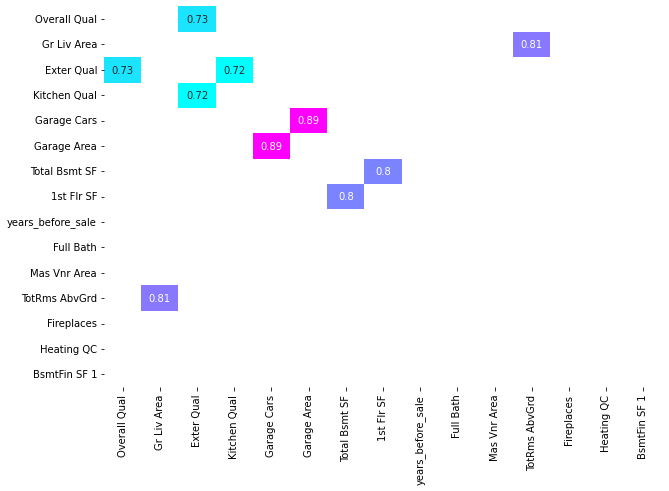

In [440]:
corrmat = data_df[strong_corrs.index].corr().abs()
corr_features_over_07  = corrmat[(corrmat > 0.7) & (corrmat <1)]
corr_features_below_07 = corrmat[corrmat <= 0.7]
#sns.set_style('white')
plt.figure(figsize=(10, 7))
sns.heatmap(corr_features_over_07, cmap='cool',
            annot=True,
            cbar=False)

There are some columns that have 5 pairs of highly correlated columns. Let's take a closer look:

In [441]:
# start a table to visualize the pairs we identified above
all_pairs = (corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
             .stack().sort_values(ascending=False))
# filter for high correlation pairs
coll_pairs = all_pairs[all_pairs > 0.7].to_frame().reset_index()
coll_pairs

<ipython-input-441-fb7c104ecaf5>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  all_pairs = (corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))


,level_0,level_1,0
0,Garage Cars,Garage Area,1
1,Gr Liv Area,TotRms AbvGrd,1
2,Total Bsmt SF,1st Flr SF,1
3,Overall Qual,Exter Qual,1
4,Exter Qual,Kitchen Qual,1


The pairs are below, in general we would keep the highest correlated to 'SalePrice' and drop the other from feature selection, in practice we are going to keep the most continuous features:
- **'Garage Cars'** and **'Garage Area'**
- **'Gr Liv Area'** and **'TotRms AbvGrd'**
- **'Total Bsmt SF'** and **'1st Flr SF'**
- **'Overall Qual'** and **'Exter Qual'**
- **'Exter Qual'** and **'Kitchen Qual'**

We are going to drop from our feature selection list: **'Garage Cars'**, **'TotRms AbvGrd'**, **'Total Bsmt SF'**, **'Exter Qual'** and **'Kitchen Qual'** as we are going to use **'Overall Qual'** only as proxy for the house quality.

In [443]:
# add features below 0.4 correlation to feature selection list
feature_selection = corr_features_below_07.index
# remove intercorrelated columns
feature_selection = feature_selection.drop(['Garage Cars','TotRms AbvGrd','Total Bsmt SF','Exter Qual','Kitchen Qual'])
feature_selection

Index(['Overall Qual', 'Gr Liv Area', 'Garage Area', '1st Flr SF',
       'years_before_sale', 'Full Bath', 'Mas Vnr Area', 'Fireplaces',
       'Heating QC', 'BsmtFin SF 1'],
      dtype='object')

We can now visualize these columns relationship with **'SalePrice'** in a series of scatter plots:

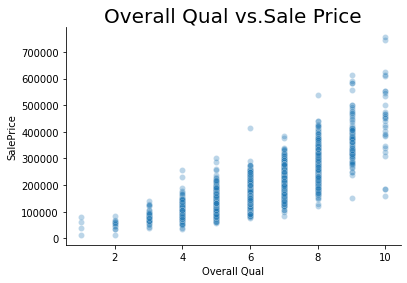

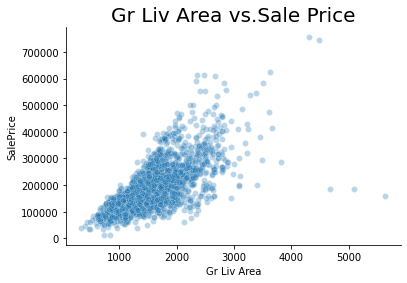

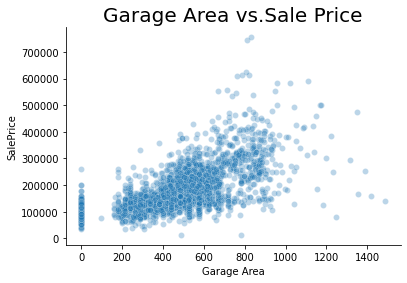

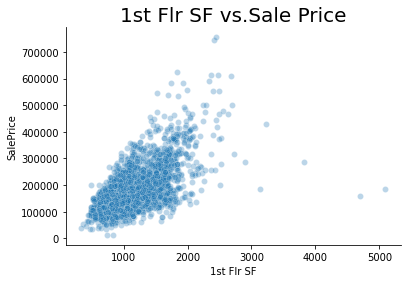

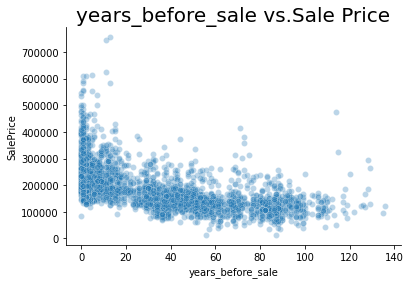

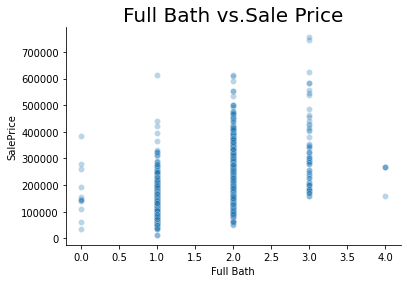

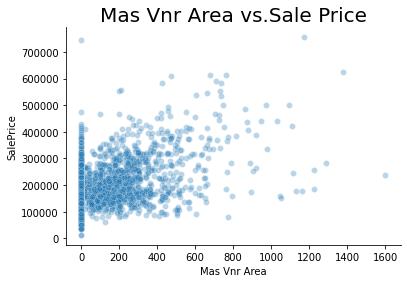

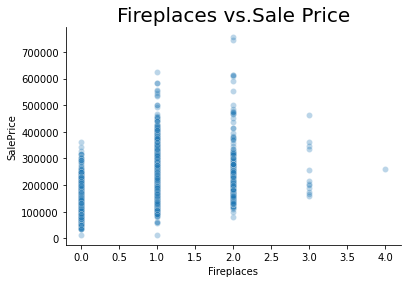

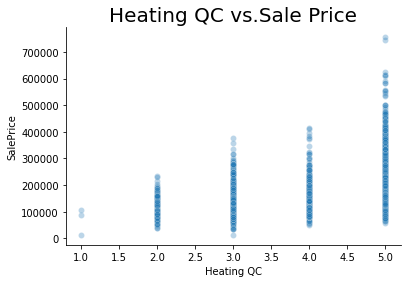

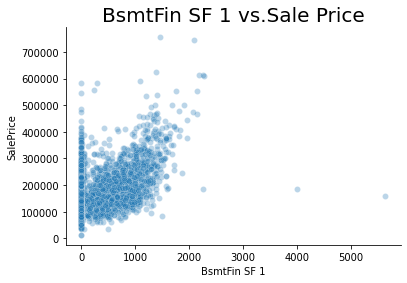

In [366]:
for f in feature_selection:
    plt.figure()
    plt.title(f'{f} vs.Sale Price', fontsize=20)
    sns.scatterplot(x=data_df[f], y=data_df['SalePrice'],palette='pastel', alpha=0.3)
    sns.despine()
    plt.show()

We can notice outliers in most columns, so let's take a closer look with Box Plots:

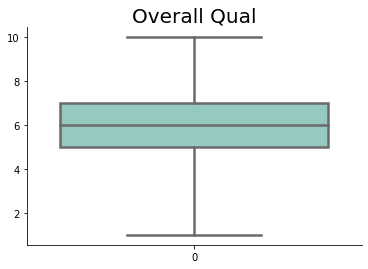

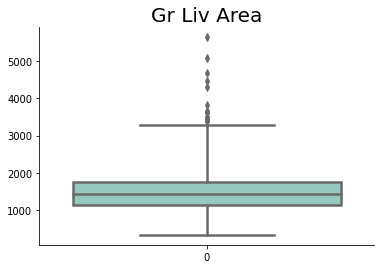

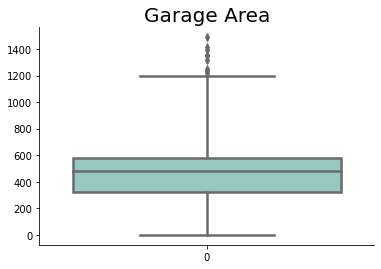

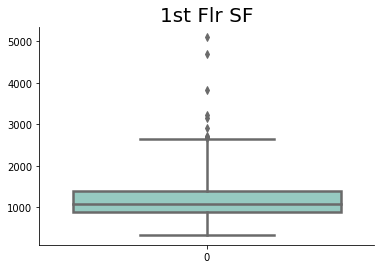

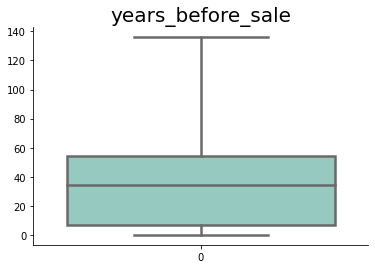

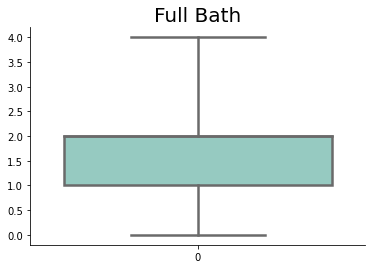

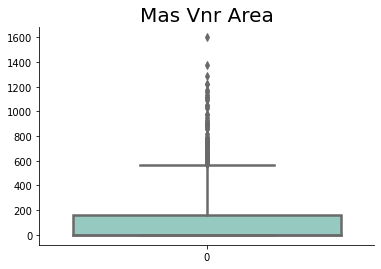

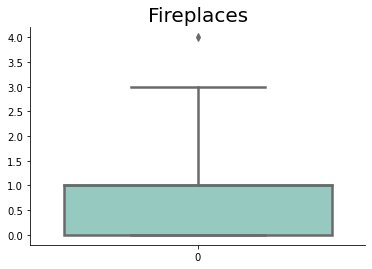

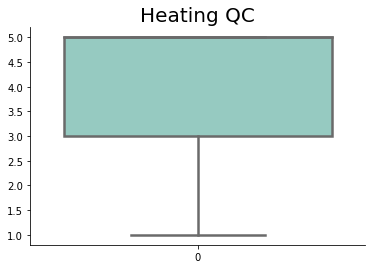

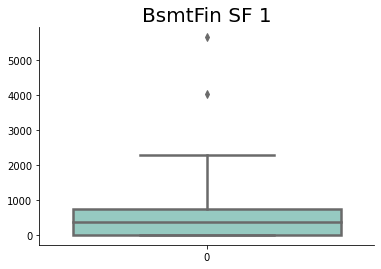

In [367]:
for f in feature_selection:
    plt.figure()
    plt.title(f'{f}', fontsize=20)
    sns.boxplot(data=data_df[f], whis=2.5, palette="Set3", linewidth=2.5)
    sns.despine()
    plt.show()

There are some outliers we might need to take into consideration if our model results are not satisfactory.

### 4.3 Categorical Features

In [368]:
categorical_features = ['MS SubClass', 'MS Zoning', 'Street', 'Land Contour', 'Lot Config',
                        'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
                        'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
                        'Foundation', 'Heating', 'Central Air']

In [369]:
# we need to check how many unique values each column has:
pd.options.display.float_format = '{:.0f}'.format
for f in categorical_features:
    print(f'\033[1m{f}\033[0m:\n{data_df[f].value_counts(normalize=True, ascending=False)*100}\n')

MS SubClass:
20    37
60    20
50    10
120    7
30     5
160    4
70     4
80     4
90     4
190    2
85     2
75     1
45     1
180    1
40     0
150    0
Name: MS SubClass, dtype: float64

MS Zoning:
RL        78
RM        16
FV         5
RH         1
C (all)    1
I (all)    0
A (agr)    0
Name: MS Zoning, dtype: float64

Street:
Pave   100
Grvl     0
Name: Street, dtype: float64

Land Contour:
Lvl   90
HLS    4
Bnk    4
Low    2
Name: Land Contour, dtype: float64

Lot Config:
Inside    73
Corner    17
CulDSac    6
FR2        3
FR3        0
Name: Lot Config, dtype: float64

Neighborhood:
NAmes     15
CollgCr    9
OldTown    8
Edwards    7
Somerst    6
NridgHt    6
Gilbert    6
Sawyer     5
NWAmes     4
SawyerW    4
Mitchel    4
BrkSide    4
Crawfor    4
IDOTRR     3
Timber     2
NoRidge    2
StoneBr    2
SWISU      2
ClearCr    2
MeadowV    1
BrDale     1
Blmngtn    1
Veenker    1
NPkVill    1
Blueste    0
Greens     0
GrnHill    0
Landmrk    0
Name: Neighborhood, dtype: float64

Co

We are going to filter out columns with more than 5 unique values, and get dummies for all the others.

In [271]:
# remove columns with more than 5 unique values
keep_cat_feat = []
for f in categorical_features:
    if data_df[f].nunique() < 6:
        keep_cat_feat.append(f)
        # categorical_features.remove(f)
print(keep_cat_feat)
print(len(keep_cat_feat))

['Street', 'Land Contour', 'Lot Config', 'Bldg Type', 'Central Air']
5


In [370]:
# add dummy columns to the feature selection list
cat_cols_add = pd.get_dummies(data_df[keep_cat_feat]).columns
feature_selection = feature_selection.append(cat_cols_add)
print(feature_selection)
print(len(feature_selection))

Index(['Overall Qual', 'Gr Liv Area', 'Garage Area', '1st Flr SF',
       'years_before_sale', 'Full Bath', 'Mas Vnr Area', 'Fireplaces',
       'Heating QC', 'BsmtFin SF 1', 'Street_Grvl', 'Street_Pave',
       'Land Contour_Bnk', 'Land Contour_HLS', 'Land Contour_Low',
       'Land Contour_Lvl', 'Lot Config_Corner', 'Lot Config_CulDSac',
       'Lot Config_FR2', 'Lot Config_FR3', 'Lot Config_Inside',
       'Bldg Type_1Fam', 'Bldg Type_2fmCon', 'Bldg Type_Duplex',
       'Bldg Type_Twnhs', 'Bldg Type_TwnhsE', 'Central Air_N',
       'Central Air_Y'],
      dtype='object')
28


In [371]:
# Create dummies off the remaining category columns and add them back to the dataframe
data_df = pd.concat([
    data_df,
    pd.get_dummies(data_df[keep_cat_feat])
], axis=1).drop(data_df[categorical_features],axis=1)
# we are also dropping the rest of the categorical features

In [372]:
print(data_df.columns)
print(len(data_df.columns))

Index(['Lot Area', 'Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual',
       'Overall Cond', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating QC', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'SalePrice', 'years_before_sale', 'years_until_remod', 'Street_Grvl',
       'Street_Pave', 'Land Contour_Bnk', 'Land Contour_HLS',
       'Land Contour_Low', 'Land Contour_Lvl', 'Lot Config_Corner',
       'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_FR3',
       'Lot Config_Inside', 'Bldg Type_1Fam', 'Bldg Type_2fmCon',
       'Bldg Type_Duple

## 5. Model Training & Testing
Now that we have our dataset ready and a list of features ready we can start working on training & testing the model.
- 5.1 Base Case K=0
- 5.2 Two Fold Case
- 5.3 K-fold Case (K=5)
### 5.1 Base Case K=0

In [373]:
# start with splitting the DataFrame in train and test datasets in the base case
train_df = data_df[:1460]
test_df = data_df[1460:]

In [374]:
# set targets and features
# we already have features
feature_selection
target = 'SalePrice'

In [378]:
# initiate model
lr = LinearRegression()
# fit model
lr.fit(train_df[feature_selection], train_df[target])
# test model
test_pred = lr.predict(test_df[feature_selection])
# calculate mse and rmse
test_mse = mean_squared_error(test_df[target], test_pred)
test_rmse = np.sqrt(test_mse)
print('RMSE base case:', test_rmse)

RMSE base case: 38731.76340531525


We are getting an RMSE of $38k, which can probably be improved with better Feature Engineering and by applying K-fold validation.

### 5.2 Second Case Two-Fold model with randomization K=1
In this case we are going to randomize the dataframe before splitting into train and test datasets, which are going to be called fold_one and fold_two. We are going to cross validate two models in this case and calculate the mean to get the RMSE

In [379]:
# Randomize *all* rows (frac=1) from `df` and return
shuffled_df = data_df.sample(frac=1, )
# Split dataset into two folds
fold_one = data_df[0:1460]
fold_two = data_df[1460:]

In [380]:
# initiate model
lr = LinearRegression()

We now proceed with **Model 1**

In [382]:
# fit model one
lr.fit(fold_one[feature_selection], fold_one[target])
# test model one
pred_one = lr.predict(fold_two[feature_selection])
# calculate mse and rmse one
mse_one = mean_squared_error(fold_two[target], pred_one)
rmse_one = np.sqrt(mse_one)

**Model 2**

In [383]:
# fit model two
lr.fit(fold_two[feature_selection], fold_two[target])
# test model two
pred_two = lr.predict(fold_one[feature_selection])
# calculate mse and rmse one
mse_two = mean_squared_error(fold_one[target], pred_two)
rmse_two = np.sqrt(mse_two)

In [384]:
# get average
avg_rmse = (rmse_one + rmse_two)/2
print('RMSE Two-Fold case:',avg_rmse)

RMSE Two-Fold case: 34944.45228130344


By using a Two-Fold method for cross validation we reduced RMSE from 38731 to 34944 which is ~10% better.

### 5.3 K-Fold Case (K=5)
In this case we are going to apply K=5 (later it will be a parameter) for the number of Folds to be used for cross validation of the model

In [388]:
# initiate KFold method
kf = KFold(n_splits = 5, shuffle = True)
# initiate list for values
rmse_values = []

In [390]:
for train_index, test_index in kf.split(data_df):
    # split into train and test
    train_df = data_df.iloc[train_index]
    test_df = data_df.iloc[test_index]
    # fit model
    lr.fit(train_df[feature_selection], train_df[target])
    # predict results
    predictions = lr.predict(test_df[feature_selection])
    # calculate mse and rmse
    mse_k = mean_squared_error(test_df[target], predictions)
    rmse_k = np.sqrt(mse_k)
    rmse_values.append(rmse_k)
rmse_values

[32885.05010123351,
 31059.487134973613,
 34825.38908871706,
 39806.00533285293,
 29454.36534475465]

In [393]:
avg_rmses_k = sum(rmse_values)/len(rmse_values)
print('RMSE K-Fold case:', avg_rmses_k)

RMSE K-Fold case: 33606.059400506354


With K-fold cross validation we brought down our RMSE to 33606 from 34944 which is almost another 5%.

## 6. Create functions to summarize all the above steps

In [396]:
# initiate cleaning function
def cleaning(df):
    # prep a copy of the input DataFrame
    data_df = df.copy()

    # clean numeric columns
    # identify numeric columns
    numeric_cols = data_df.select_dtypes(include=['int','float'])
    # select cutoff for null value% in columns
    cutoff = round(len(data_df)/20,2)
    # find null values
    null_counts = numeric_cols.isnull().sum()
    # filter columns
    null_counts = null_counts[null_counts > cutoff]
    # drop columns
    data_df = data_df.drop(null_counts.index, axis=1)

    # clean text columns
    # identify text columns
    text_cols = data_df.select_dtypes(include=['object'])
    # check null values in text columns
    null_text_counts  = text_cols.isnull().sum()
    # filter
    null_text_counts = null_text_counts[null_text_counts > 0]
    # drop text columns  with more than one missing value
    data_df = data_df.drop(null_text_counts.index, axis=1)

    # get numeric columns to fillna with mean
    num_cols = data_df.select_dtypes(include=['int','float'])
    num_cols_name = num_cols.columns
    # fill
    data_df[num_cols_name] = data_df[num_cols_name].fillna(num_cols.mean())
    return data_df

In [397]:
# we need to create a list of categorical features of this dataframe accordung to documentation
categorical_features = ['MS SubClass', 'MS Zoning', 'Street', 'Land Contour', 'Lot Config',
                        'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
                        'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
                        'Foundation', 'Heating', 'Central Air']

In [450]:
# which we are going to update with the above steps after using the transform_features function
def select_features(data_df, coeff_threshold, unique_cutoff, coll):
    feature_selection = []
    # text columns
    # get text columns left according to documentation
    categorical_features = ['MS SubClass', 'MS Zoning', 'Street', 'Land Contour', 'Lot Config',
                            'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
                            'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
                            'Foundation', 'Heating', 'Central Air']
    # remove columns with more than unique_cutoff unique values
    keep_cat_feat = []
    for f in categorical_features:
        if data_df[f].nunique() < unique_cutoff:
            keep_cat_feat.append(f)
    # add dummies from remaining text columns to feature_selection list
    cat_cols_add = pd.get_dummies(data_df[keep_cat_feat]).columns
    for c in cat_cols_add:
        feature_selection.append(c)
    #feature_selection = feature_selection.append(cat_cols_add)
    # Create dummies off the remaining category columns and add them back to the dataframe
    data_df = pd.concat([
        data_df,
        pd.get_dummies(data_df[keep_cat_feat])
    ], axis=1).drop(data_df[categorical_features],axis=1)
    # we are also dropping the rest of the categorical features

    # ordinal columns
    # initiate ordinal features list to easily handle these columns
    ordinal_features = ['Lot Shape', 'Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond',
                        'Heating QC', 'Kitchen Qual',
                        'Functional', 'Paved Drive']
    # as we checked earlier there aren't too many values and we can map them
    # prepare a dictionary to map columns to new values
    ordinal_mapping = {'Lot Shape': {'Reg': 4, 'IR1':3, 'IR2':2, 'IR3':1},
                       'Utilities': {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1},
                       'Land Slope': {'Gtl':3, 'Mod':2, 'Sev':1},
                       'Exter Qual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                       'Exter Cond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                       'Heating QC': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                       'Kitchen Qual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                       'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1},
                       'Paved Drive':  {'Y': 3, 'P': 2, 'N': 1}
                       }
    # map columns to new values
    for f in ordinal_features:
        data_df[f] = data_df[f].map(ordinal_mapping[f])

    # numeric feature & correlations
    # check correlations
    corrmat = data_df.corr()
    sorted_corrs = corrmat['SalePrice'].abs().sort_values(ascending=False).drop('SalePrice').round(2)
    # let's look at correlations to 'SalePrice' above coeff_threshold only
    strong_corrs = sorted_corrs[sorted_corrs > coeff_threshold]
    corrmat = data_df[strong_corrs.index].corr().abs()
    # check strong multicollinearity
    corr_features_over_coll  = corrmat[(corrmat > coll) & (corrmat <1)]
    corr_features_under_coll = corrmat[corrmat <= coll ]
    # start a table to visualize the pairs we identified above
    # add features below corr_threshold correlation value to feature selection list
    for c in strong_corrs.index:
        feature_selection.append(c)
    # feature_selection = feature_selection.remove(['Garage Cars','TotRms AbvGrd','Total Bsmt SF','Exter Qual','Kitchen Qual'])
    # feature_selection = feature_selection.append(corr_features_over_coll.index)
    return data_df, feature_selection

In [451]:
# initiate function to split dataframe into train and test
# perform all fitting, predictions, mse, rmse within the same function
# add an optional parameter k for Kfold validation, with default value 0
def train_and_test(transform_df, k=0):
    # set features & targets
    # get features from inputs
    target = 'SalePrice'
    # initiate Linear Regression model
    lr = LinearRegression()
    # default case
    if k == 0:
        # Split dataset in train & test
        train = transform_df[0:1460]
        test = transform_df[1460:]
        # fit model
        lr.fit(train[feature_selection2],train[target])
        # test model
        test_pred = lr.predict(test[feature_selection2])
        # calculate mse and rmse
        test_mse = mean_squared_error(test[target], test_pred)
        test_rmse = np.sqrt(test_mse)
        return test_rmse
    # k=1 parameter
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = transform_df.sample(frac=1, )
        # Split dataset into two folds
        fold_one = transform_df[0:1460]
        fold_two = transform_df[1460:]
        # fit model one
        lr.fit(fold_one[feature_selection2],fold_one[target])
        # prediction_one
        # for prediction_one: train on fold_one and test on fold_two
        prediction_one = lr.predict(fold_two[feature_selection2])
        # calculate mse and rmse one
        test_mse_one = mean_squared_error(fold_two[target], prediction_one)
        test_rmse_one = np.sqrt(test_mse_one)

        # fit model two
        lr.fit(fold_two[feature_selection2], fold_two[target])
        # prediction two
        # for prediction two train on fold_two and test on fold_one
        prediction_two = lr.predict(fold_one[feature_selection2])
        # calculate mse and rmse two
        test_mse_two = mean_squared_error(fold_one[target], prediction_two)
        test_rmse_two = np.sqrt(test_mse_two)
        # calculate rmse avg
        avg_rmse = (test_rmse_one + test_rmse_two)/2
        return avg_rmse
    else:
        kf = KFold(n_splits = k, shuffle = True)
        # initiate list for values
        rmse_values = []
        for train_index, test_index, in kf.split(transform_df):
            # split into train and test
            train = transform_df.iloc[train_index]
            test = transform_df.iloc[test_index]
            # fit model
            lr.fit(train[feature_selection2], train[target])
            # predict results
            predictions = lr.predict(test[feature_selection2])
            # calculate mse and rmse
            mse = mean_squared_error(test[target], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse_k)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

In [452]:
data_df2 = cleaning(data)
data_df2, feature_selection2 = select_features(data_df2, coeff_threshold=0.4, unique_cutoff=6, coll=0.7 )
rmse_val_0 = train_and_test(data_df2, k=0)
rmse_val_1 = train_and_test(data_df2, k=1)
rmse_val_5 = train_and_test(data_df2, k=5)
rmse_val_10 = train_and_test(data_df2, k=10)
print(rmse_val_0)
print(rmse_val_1)
print(rmse_val_5)
print(rmse_val_10)

38115.59783896944
33820.09706839673
29454.365344754646
29454.365344754646


## Next Steps
- Continue iteration on feature engineering:
    - Reserach some other approaches to feature engineering online around housing data.
    - Visit the Kaggle kernels page for this dataset to see approaches others took.
- Improve your feature selection:
    - Research ways of doing feature selection better with categorical columns (something we didn't cover in this particular course).